<a href="https://colab.research.google.com/github/AndrewHung87/PandaPractice/blob/main/body_fat_prediction_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/body-fat-prediction-dataset")

print("Path to dataset files:", path)


Path to dataset files: /root/.cache/kagglehub/datasets/fedesoriano/body-fat-prediction-dataset/versions/1


In [18]:
import pandas as pd

bodyfat = pd.read_csv(path + "/bodyfat.csv")
bodyfat.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

sns.set(style = "whitegrid")

In [24]:
# check number of rows and columns
print("shape:", bodyfat.shape)

# column names
print("Columns:", bodyfat.columns.tolist())

# check for missing values
print("Missing values:", bodyfat.isnull().sum())

# summary stats
bodyfat.describe()

shape: (252, 15)
Columns: ['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist']
Missing values: Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64


,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


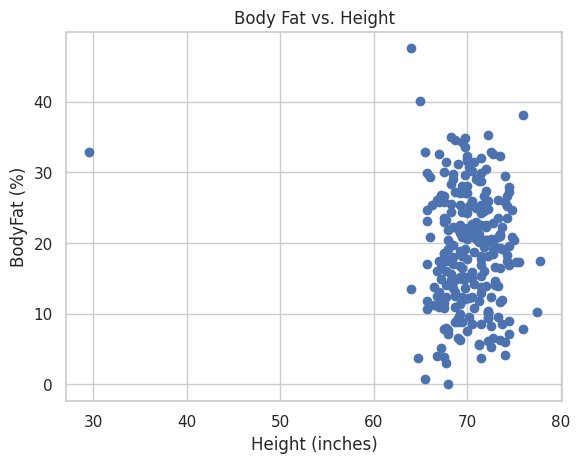

In [26]:
plt.scatter(bodyfat['Height'], bodyfat['BodyFat'])
plt.xlabel('Height (inches)')
plt.ylabel('BodyFat (%)')
plt.title('Body Fat vs. Height')
plt.show()

Mean Height: 70.31075697211155


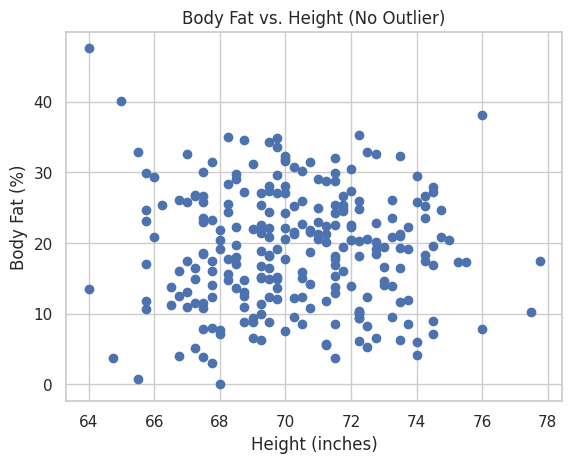

In [27]:
# Identify outlier (unusually small height)
bodyfat[bodyfat['Height'] < 40]  # Usually, height under 40 inches is incorrect/outlier

# Remove outlier
bodyfat_clean = bodyfat[bodyfat['Height'] > 40]

# Confirm the mean height
mean_height = bodyfat_clean['Height'].mean()
print("Mean Height:", mean_height)

# Plot again without outlier
plt.scatter(bodyfat_clean['Height'], bodyfat_clean['BodyFat'])
plt.xlabel('Height (inches)')
plt.ylabel('Body Fat (%)')
plt.title('Body Fat vs. Height (No Outlier)')
plt.show()


In [28]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Linear regression model
model_height = smf.ols('BodyFat ~ Height', data=bodyfat_clean).fit()

# Model summary
print(model_height.summary())


                            OLS Regression Results                            
Dep. Variable:                BodyFat   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.1362
Date:                Tue, 25 Mar 2025   Prob (F-statistic):              0.712
Time:                        01:30:25   Log-Likelihood:                -887.97
No. Observations:                 251   AIC:                             1780.
Df Residuals:                     249   BIC:                             1787.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.3412     14.221      1.712      0.0

In [29]:
# Linear regression model (BodyFat vs. Weight)
model_weight = smf.ols('BodyFat ~ Weight', data=bodyfat_clean).fit()

# Model summary
print(model_weight.summary())


                            OLS Regression Results                            
Dep. Variable:                BodyFat   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     148.2
Date:                Tue, 25 Mar 2025   Prob (F-statistic):           4.60e-27
Time:                        01:39:46   Log-Likelihood:                -829.43
No. Observations:                 251   AIC:                             1663.
Df Residuals:                     249   BIC:                             1670.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.8889      2.579     -4.610      0.0

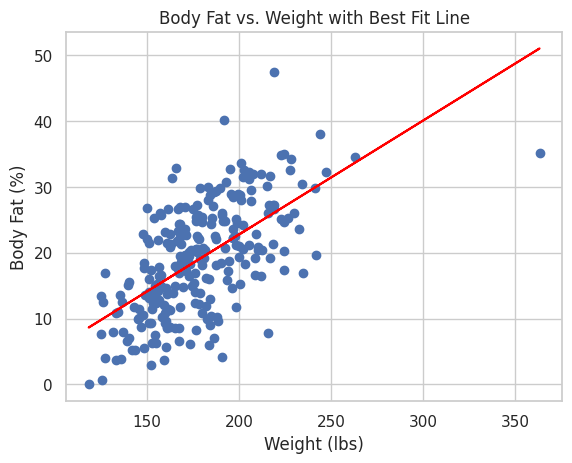

In [31]:
# Plot with regression line:
plt.scatter(bodyfat_clean['Weight'], bodyfat_clean['BodyFat'])
plt.plot(bodyfat_clean['Weight'], model_weight.fittedvalues, color='red') # best fit line
plt.xlabel('Weight (lbs)')
plt.ylabel('Body Fat (%)')
plt.title('Body Fat vs. Weight with Best Fit Line')
plt.show()


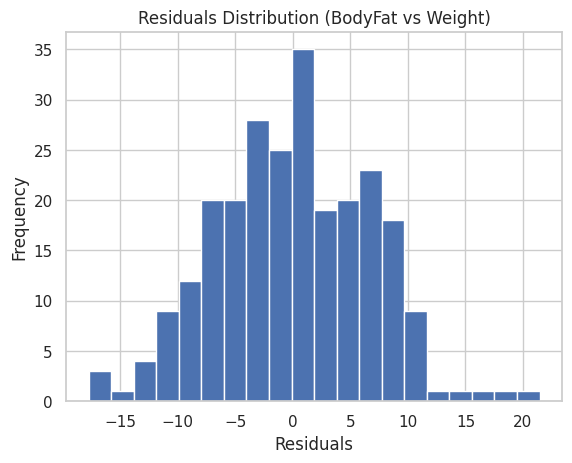

In [32]:
# Residual Histogram:
residuals = model_weight.resid
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution (BodyFat vs Weight)')
plt.show()

In [34]:
# Predictions (with 99% confidence intervals):

new_data = pd.DataFrame({'Weight': [150, 300]})
predictions = model_weight.get_prediction(new_data)
print(predictions.summary_frame(alpha=0.01))

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  14.102173  0.585383      12.582684      15.621663     -3.139442   
1  40.093254  1.774558      35.487003      44.699504     22.311747   

   obs_ci_upper  
0     31.343789  
1     57.874761  


In [35]:
# Linear Model (BodyFat vs. Weight + Height)

model_wh = smf.ols('BodyFat ~ Weight + Height', data=bodyfat_clean).fit()
print(model_wh.summary())

                            OLS Regression Results                            
Dep. Variable:                BodyFat   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     128.7
Date:                Tue, 25 Mar 2025   Prob (F-statistic):           4.50e-39
Time:                        03:10:48   Log-Likelihood:                -798.68
No. Observations:                 251   AIC:                             1603.
Df Residuals:                     248   BIC:                             1614.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     72.5244     10.426      6.956      0.0

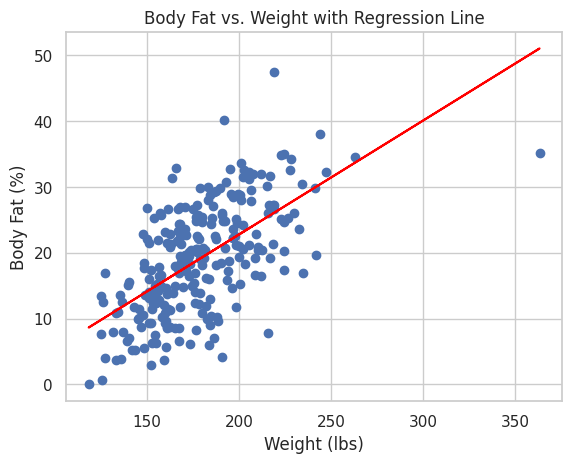

In [36]:
plt.scatter(bodyfat_clean['Weight'], bodyfat_clean['BodyFat'])
plt.plot(bodyfat_clean['Weight'], model_weight.fittedvalues, color='red')
plt.xlabel('Weight (lbs)')
plt.ylabel('Body Fat (%)')
plt.title('Body Fat vs. Weight with Regression Line')
plt.show()

In [37]:
new_data = pd.DataFrame({'Weight': [150, 300]})
predictions = model_weight.get_prediction(new_data)
print(predictions.summary_frame(alpha=0.01))

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  14.102173  0.585383      12.582684      15.621663     -3.139442   
1  40.093254  1.774558      35.487003      44.699504     22.311747   

   obs_ci_upper  
0     31.343789  
1     57.874761  


In [38]:
# Adding BMI (imperial)
bodyfat_clean['BMI'] = bodyfat_clean['Weight'] / (bodyfat_clean['Height'] ** 2) * 703


<ipython-input-38-13f46b91bd3a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bodyfat_clean['BMI'] = bodyfat_clean['Weight'] / (bodyfat_clean['Height'] ** 2) * 703


In [39]:
model_bmi = smf.ols('BodyFat ~ BMI', data=bodyfat_clean).fit()
print(model_bmi.summary())

                            OLS Regression Results                            
Dep. Variable:                BodyFat   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     275.7
Date:                Tue, 25 Mar 2025   Prob (F-statistic):           3.44e-42
Time:                        03:25:05   Log-Likelihood:                -794.49
No. Observations:                 251   AIC:                             1593.
Df Residuals:                     249   BIC:                             1600.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -22.8594      2.553     -8.955      0.0

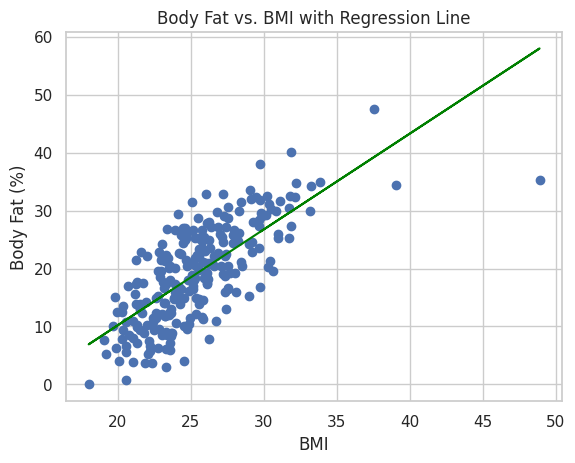

In [40]:
plt.scatter(bodyfat_clean['BMI'], bodyfat_clean['BodyFat'])
plt.plot(bodyfat_clean['BMI'], model_bmi.fittedvalues, color='green')
plt.xlabel('BMI')
plt.ylabel('Body Fat (%)')
plt.title('Body Fat vs. BMI with Regression Line')
plt.show()

In [45]:
predictions = model_bmi.get_prediction(pd.DataFrame({'BMI': [150, 300]}))
pred_summary = predictions.summary_frame(alpha=0.01)

print(pred_summary)

         mean    mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  225.072335  12.409675     192.860321     257.284349    189.563213   
1  473.004035  27.337771     402.042898     543.965172    400.486680   

   obs_ci_upper  
0    260.581457  
1    545.521390  


In [47]:
# Adding Categorical Age Group
bodyfat_clean['AgeGroup'] = pd.cut(bodyfat_clean['Age'],
                                   bins=[-np.inf, 40, 60, np.inf],
                                   labels=['Young', 'Middle', 'Senior'])


<ipython-input-47-8c709e02ea78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bodyfat_clean['AgeGroup'] = pd.cut(bodyfat_clean['Age'],


In [49]:
model_age_bmi = smf.ols('BodyFat ~ BMI + AgeGroup', data=bodyfat_clean).fit()
print(model_age_bmi.summary())

                            OLS Regression Results                            
Dep. Variable:                BodyFat   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     109.2
Date:                Tue, 25 Mar 2025   Prob (F-statistic):           5.09e-45
Time:                        03:42:26   Log-Likelihood:                -782.11
No. Observations:                 251   AIC:                             1572.
Df Residuals:                     247   BIC:                             1586.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -22.8344      2

<ipython-input-51-c0fd65e0f871>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bodyfat_clean['Predicted'] = model_age_bmi.predict(bodyfat_clean)


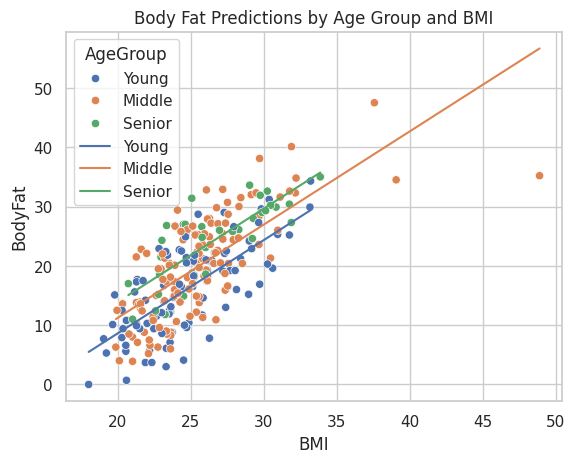

In [51]:
# Plot predictions by group

bodyfat_clean['Predicted'] = model_age_bmi.predict(bodyfat_clean)

sns.scatterplot(x='BMI', y='BodyFat', hue='AgeGroup', data=bodyfat_clean)
sns.lineplot(x='BMI', y='Predicted', hue='AgeGroup', data=bodyfat_clean)
plt.title('Body Fat Predictions by Age Group and BMI')
plt.show()